In [5]:
# import libraries
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler, MinMaxScaler
from numpy import loadtxt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import aimodelshare as ai 
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import keras
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from featurewiz import featurewiz

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



## 1. Get data in and set up X_train, X_test, y_train objects

In [6]:
# import CSVs
X_test = pd.read_csv('X_test.csv')
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [7]:
# create labels for y train
y_train_labels = y_train.idxmax(axis=1)
y_train_labels

0       Average
1          High
2       Average
3     Very High
4          High
        ...    
83      Average
84          Low
85    Very High
86      Average
87          Low
Length: 88, dtype: object

## Explore bivariate results

In [8]:
X_train

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Peru,0.960,1.274,0.854,0.455,0.083,0.027,Peru,Americas,Latin America and the Caribbean,18.000000
1,Nicaragua,0.694,1.325,0.835,0.435,0.200,0.127,Nicaragua,Americas,Latin America and the Caribbean,125.611111
2,Greece,1.181,1.156,0.999,0.067,0.000,0.034,Greece,Europe,Southern Europe,112.000000
3,Qatar,1.684,1.313,0.871,0.555,0.220,0.167,Qatar,Asia,Western Asia,57.333333
4,Uzbekistan,0.745,1.529,0.756,0.631,0.322,0.240,Uzbekistan,Asia,Central Asia,125.611111
...,...,...,...,...,...,...,...,...,...,...,...
83,Libya,1.044,1.303,0.673,0.416,0.133,0.152,Libya,Africa,Northern Africa,1448.000000
84,Albania,0.947,0.848,0.874,0.383,0.178,0.027,Albania,Europe,Southern Europe,9.000000
85,United Kingdom,1.333,1.538,0.996,0.450,0.348,0.278,United Kingdom,Europe,Northern Europe,339.000000
86,China,1.029,1.125,0.893,0.521,0.058,0.100,China,Asia,Eastern Asia,37.000000



#### As the GDP per capita by happiness categories violin plot shows, countries with higher GDP per capita tend to be in higher happiness categories which is expected, since higher GDP per capita is usually an indicator of better economic development of the country which leads to higher happiness.
#### Countries in the 'very high' happiness category has the highest median and upper & lower quartile of GDP per capita.
#### Countries in the 'very low' happiness category has the lowest median and upper & lower quartile of GDP per capita.

<AxesSubplot: ylabel='GDP per capita'>

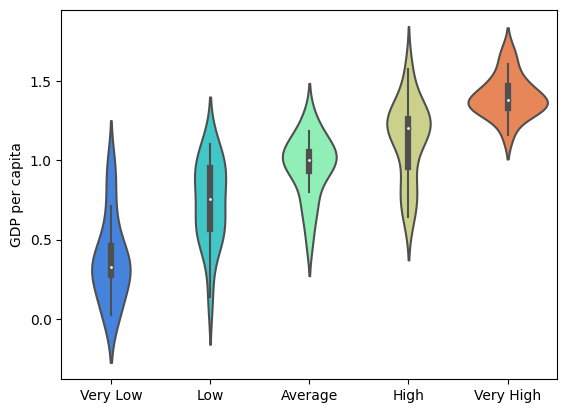

In [ ]:
sns.violinplot(y=X_train['GDP per capita'], x=y_train_labels,palette='rainbow',
               order=["Very Low","Low","Average","High", 'Very High'])


#### As the healthy life expectancy by happiness categories violin plot shows, countries with healthy life expectancy tend to be in higher happiness categories which is expected, since healthy life expectancy is an indicator of higher average number of years a person can expect to live in full health, which leads to higher happiness.
#### Countries in the 'very high' happiness category has the highest median and upper & lower quartile of healthy life expectancy.
#### Countries in the 'very low' happiness category has the lowest median and upper & lower quartile of healthy life expectancy.

<AxesSubplot: ylabel='Healthy life expectancy'>

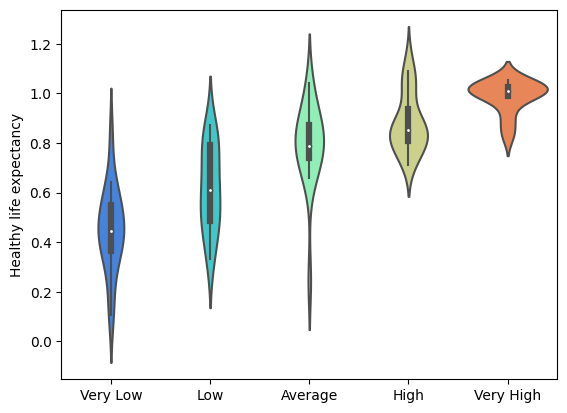

In [ ]:
sns.violinplot(y=X_train['Healthy life expectancy'], x=y_train_labels,palette='rainbow',
               order=["Very Low","Low","Average","High", 'Very High'])

#### As the social support by happiness categories violin plot shows, countries with social support tend to be in higher happiness categories which is expected, since social support is an indicator higher physical, resource & information and emotional support by your friends and family, which leads to higher happiness.
#### Countries in the 'very high' happiness category has the highest median and upper & lower quartile of social support.
#### Countries in the 'very low' happiness category has the lowest median and upper & lower quartile of social support.

<AxesSubplot: ylabel='Social support'>

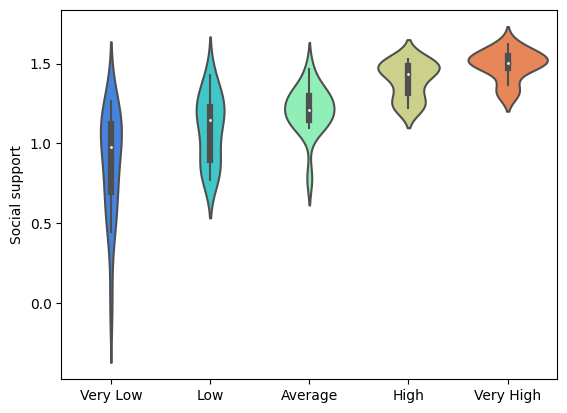

In [ ]:
sns.violinplot(y=X_train['Social support'], x=y_train_labels,palette='rainbow',
               order=["Very Low","Low","Average","High", 'Very High'])

## 2.Examine features that predict happiness categories using one or more models that allow for automatic feature selection

In [ ]:
# Merge data
data = X_train.copy()
data['target'] = y_train_labels

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (88, 12)
    Some column names had special characters which were removed...
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ##

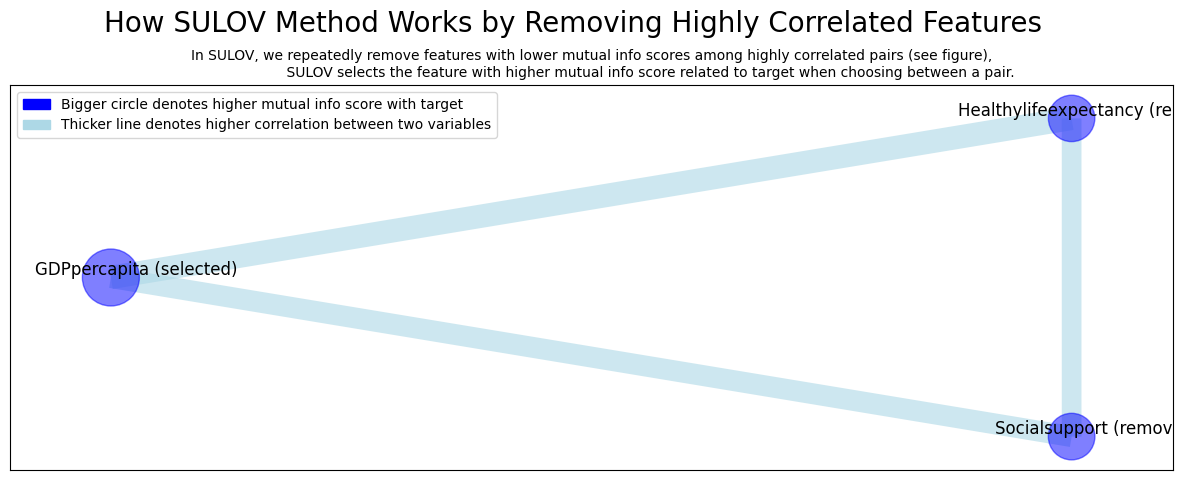

Time taken for SULOV method = 0 seconds
    Adding 2 categorical variables to reduced numeric variables  of 5
Final list of selected 7 vars after SULOV = ['Freedomtomakelifechoices', 'Generosity', 'Perceptionsofcorruption', 'Terrorist_attacks', 'GDPpercapita', 'region', 'subregion']
Converting all features to numeric before sending to XGBoost...
    there were no mixed data types or object columns that errored. Data is all numeric...
Shape of train data after adding missing values flags = (88, 8)
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 7 
    Taking top 2 features per iteration...
    XGBoost version using 1.7.3 as tree method: hist
Number of booster rounds = 100
        using 7 variab

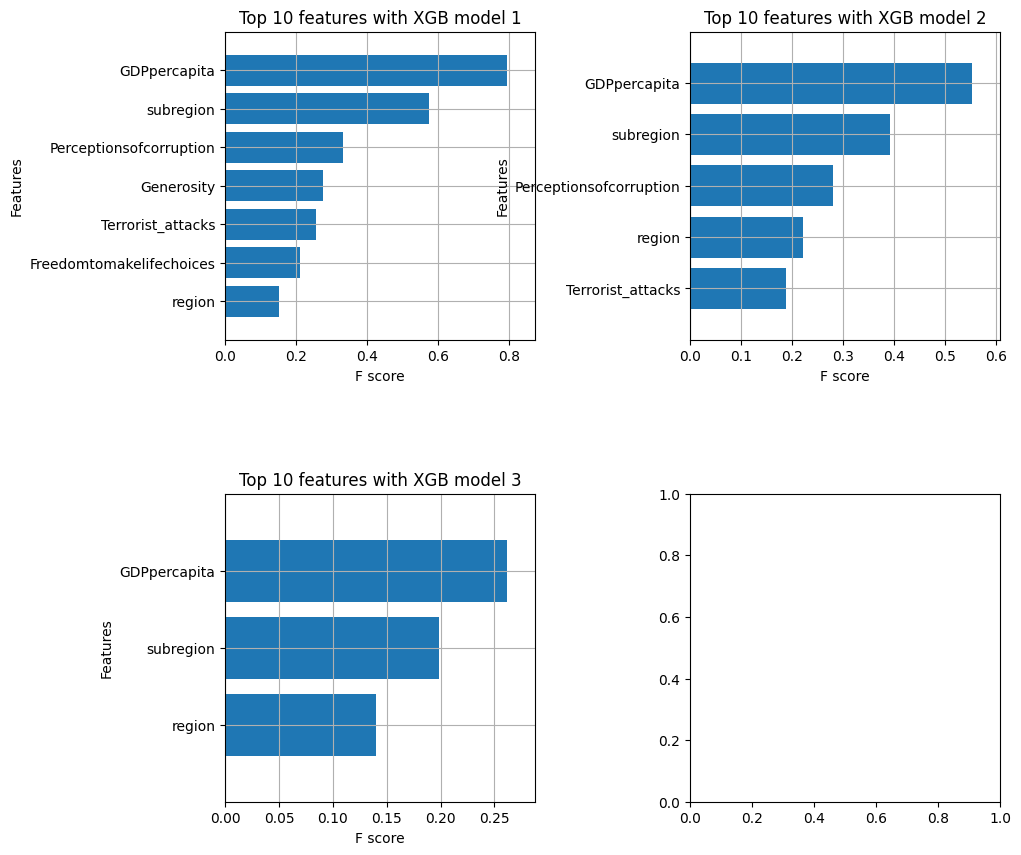

    Completed XGBoost feature selection in 0 seconds
    Alert: No ID variables ['Countryorregion', 'name'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 0 important features:
[]
Total Time taken for featurewiz selection = 1 seconds
Output contains a list of 0 important features and a train dataframe


In [ ]:
# Automatic feature selection

target = 'target'
 
features, train = featurewiz(data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

### The working of the SULOV algorithm is as follows:

### Find all the pairs of highly correlated variables exceeding a correlation threshold (say absolute(0.7)).
### Then find their MIS score (Mutual Information Score) to the target variable. MIS is a non-parametric scoring method. So its suitable for all kinds of variables and target.
### Now take each pair of correlated variables, then knock off the one with the lower MIS score.
### What’s left is the ones with the highest Information scores and least correlation with each other.
### Reference: https://github.com/AutoViML/featurewiz

### As the results suggest, Featurewiz selects 7 important features from the dataset. The Featurewiz instance returns two objects 

### Features - a list of selected features 
### One dataframe - This dataframe contains only selected features and the target variable.

In [ ]:
print(features)

['Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks', 'GDP per capita', 'region', 'sub-region']


### The features selected are 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Terrorist_attacks', 'GDP per capita', 'region', and 'sub-region'. 
### The two categorical variables removed are 'Country or region' and 'name' for being low-information variables. (already done in the sample code)
### The two numerical variables removed are 'Healthy life expectancy' and 'Social support' for being highly correlated (|correlation coefficient| > 0.7).

## 2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function

In [43]:
# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [44]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name','Social support', 'Healthy life expectancy'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [45]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

## 3. Fit model on preprocessed data and save preprocessor function and model

In [ ]:
# fit model with ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(bootstrap = 'false',
        class_weight =  "balanced",
        criterion = "gini",
        max_features = 0.6,
        min_samples_leaf = 0.1,
        min_samples_split = 0.1,
        n_estimators = 200,
        oob_score = 'false')
model.fit(preprocessor(X_train), y_train_labels)

ExtraTreesClassifier(bootstrap='false', class_weight='balanced',
                     max_features=0.6, min_samples_leaf=0.1,
                     min_samples_split=0.1, n_estimators=200,
                     oob_score='false')

### Save preprocessor function to local "preprocessor.zip" file

In [46]:
ai.export_preprocessor(preprocessor,"")

Your preprocessor is now saved to 'preprocessor.zip'


### Save model to local ".onnx" file

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition

In [13]:
#Set credentials using modelshare.org username/password

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


In [14]:
#Instantiate Competition
mycompetition= ai.Competition(apiurl)

In [ ]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"6"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 303

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## 5. Model #2

In [ ]:
# fit model with Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(
                                   learning_rate=1.2, 
                                   n_estimators=120, 
                                   subsample=1.0, 
                                   criterion='friedman_mse', 
                                   min_samples_split=2, 
                                   min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_depth=1,
                                   random_state=0)
model2.fit(preprocessor(X_train), y_train_labels)

GradientBoostingClassifier(learning_rate=1.2, max_depth=1, n_estimators=120,
                           random_state=0)

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 2: 

#-- Generate predicted values (Model 2)
prediction_labels = model2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"6"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 328

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Model 3

In [ ]:
# fit model with Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_depth = 7, n_estimators = 100)
model3.fit(preprocessor(X_train), y_train_labels)


RandomForestClassifier(max_depth=7)

In [ ]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model3.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [ ]:
#Submit Model 3: 

#-- Generate predicted values (Model 3)
prediction_labels = model3.predict(preprocessor(X_test))

# Submit Model 3 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model3.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"6"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 304

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [ ]:
# Compare two or more models
data=mycompetition.compare_models([324,312,305,299,58,66], verbose=1)
mycompetition.stylize_compare(data)

,param_name,default_value,model_version_324,model_version_312,model_version_305,model_version_299,model_version_58,model_version_66
0,ccp_alpha,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,criterion,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse,friedman_mse
2,init,None,None,None,None,None,None,None
3,learning_rate,0.100000,1.200000,1.200000,1.200000,1.300000,1.300000,1.200000
4,loss,deviance,deviance,deviance,deviance,deviance,deviance,deviance
5,max_depth,3,1,1,1,1,1,1
6,max_features,None,None,None,None,None,None,None
7,max_leaf_nodes,None,None,None,None,None,None,None
8,min_impurity_decrease,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,min_impurity_split,None,None,None,None,None,None,None


### My best model was gradient boosting classifier with 1.2 learning rate and 1 max_depth.
### After communicating with my team I tried out three other different models.
## Model 4

In [15]:
preprocessor(X_train).shape

(88, 26)

In [16]:
model4 = Sequential([Dense(500, 
            input_shape=(26, )),
        Activation('relu'),
        Dense(500),
        Dense(500),
        Activation('relu'),
        Dense(200),
        Dense(200),
        Activation('relu'),
        Dense(50),
        Dense(50),
        Activation('relu'),
        Dense(5),
        Activation('softmax')])

model4.compile('sgd','categorical_crossentropy',metrics=['accuracy'])

In [18]:
model4.fit(preprocessor(X_train), y_train, batch_size = 1, epochs = 10)

Epoch 1/10
88/88 [==============================] - 1s 12ms/step - loss: 1.5064 - accuracy: 0.4091
Epoch 2/10
88/88 [==============================] - 1s 12ms/step - loss: 1.1611 - accuracy: 0.5568
Epoch 3/10
88/88 [==============================] - 1s 16ms/step - loss: 0.9284 - accuracy: 0.6818
Epoch 4/10
88/88 [==============================] - 2s 18ms/step - loss: 0.8034 - accuracy: 0.6591
Epoch 5/10
88/88 [==============================] - 1s 15ms/step - loss: 0.7433 - accuracy: 0.7045
Epoch 6/10
88/88 [==============================] - 1s 14ms/step - loss: 0.6804 - accuracy: 0.7045
Epoch 7/10
88/88 [==============================] - 2s 18ms/step - loss: 0.6041 - accuracy: 0.8068
Epoch 8/10
88/88 [==============================] - 1s 14ms/step - loss: 0.5596 - accuracy: 0.7727
Epoch 9/10
88/88 [==============================] - 1s 10ms/step - loss: 0.3958 - accuracy: 0.8977
Epoch 10/10
88/88 [==============================] - 0s 5ms/step - loss: 0.3808 - accuracy: 0.9091


In [21]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx
from onnxmltools.convert.sparkml.utils import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model4, framework='keras',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=True)

with open("model4.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [27]:
#Submit Model 4: 

#-- Generate predicted values (Model 4)
prediction_labels = model4.predict(preprocessor(X_test), batch_size = 1)
y_classes = prediction_labels.argmax(axis=-1)
labels = ['Average', 'High', 'Low', 'Very High', 'Very Low']
predicted_label = np.array(sorted(labels))[y_classes]

# Submit Model 4 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model4.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=predicted_label,
                                 custom_metadata = {"team":"6"})

68/68 [==============================] - 0s 2ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 537

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Model 5

In [63]:
model5 = Sequential([Dense(100, 
            input_shape=(26, )),
        Activation('relu'),
                Dense(200),
        Dense(200),
        Activation('relu'),
                Dense(100),
        Dense(100),
        Activation('relu'),
                Dense(50),
        Dense(50),
        Activation('relu'),
                        Dense(32),
        Dense(32),
        Activation('relu'),
        Dense(5),
        Activation('softmax')])

model5.compile('sgd','categorical_crossentropy',metrics=['accuracy'])

In [64]:
model5.fit(preprocessor(X_train), y_train, batch_size = 1, epochs = 10)

Epoch 1/10
88/88 [==============================] - 1s 3ms/step - loss: 1.5346 - accuracy: 0.4318
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 1.2906 - accuracy: 0.4886
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.5114
Epoch 4/10
88/88 [==============================] - 0s 2ms/step - loss: 0.9554 - accuracy: 0.5341
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.8417 - accuracy: 0.6023
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.6364
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: 0.7776 - accuracy: 0.6023
Epoch 8/10
88/88 [==============================] - 0s 2ms/step - loss: 0.7500 - accuracy: 0.6250
Epoch 9/10
88/88 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.6932
Epoch 10/10
88/88 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7273


In [65]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx
from onnxmltools.convert.sparkml.utils import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model5, framework='keras',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=True)

with open("model5.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [66]:
#Submit Model 5: 

#-- Generate predicted values (Model 5)
prediction_labels = model5.predict(preprocessor(X_test), batch_size = 1)
y_classes = prediction_labels.argmax(axis=-1)
labels = ['Average', 'High', 'Low', 'Very High', 'Very Low']
predicted_label = np.array(sorted(labels))[y_classes]

# Submit Model 5 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model5.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=predicted_label,
                                 custom_metadata = {"team":"6"})

68/68 [==============================] - 0s 3ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 539

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


## Model 6

In [137]:
model6 = Sequential([Dense(100, 
            input_shape=(26, )),
        Activation('relu'),
                Dense(200),
        Dense(200),
        Activation('relu'),
                Dense(100),
        Dense(100),
        Activation('relu'),
                Dense(50),
        Dense(50),
        Activation('relu'),
        Dense(5),
        Activation('softmax')])

model6.compile('sgd','categorical_crossentropy',metrics=['accuracy'])

In [139]:
model6.fit(preprocessor(X_train), y_train, batch_size = 1, epochs = 10)

Epoch 1/10
88/88 [==============================] - 1s 4ms/step - loss: 0.8018 - accuracy: 0.6705
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 0.7024 - accuracy: 0.7500
Epoch 3/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.7500
Epoch 4/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.7841
Epoch 5/10
88/88 [==============================] - 0s 3ms/step - loss: 0.6068 - accuracy: 0.7614
Epoch 6/10
88/88 [==============================] - 0s 3ms/step - loss: 0.5845 - accuracy: 0.7273
Epoch 7/10
88/88 [==============================] - 0s 3ms/step - loss: 0.5340 - accuracy: 0.7955
Epoch 8/10
88/88 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8750
Epoch 9/10
88/88 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.7841
Epoch 10/10
88/88 [==============================] - 0s 3ms/step - loss: 0.4342 - accuracy: 0.8182


In [140]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx
from onnxmltools.convert.sparkml.utils import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model6, framework='keras',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=True)

with open("model6.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [142]:
#Submit Model 6: 

#-- Generate predicted values (Model 6)
prediction_labels = model6.predict(preprocessor(X_test), batch_size = 1)
y_classes = prediction_labels.argmax(axis=-1)
labels = ['Average', 'High', 'Low', 'Very High', 'Very Low']
predicted_label = np.array(sorted(labels))[y_classes]

# Submit Model 6 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model6.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=predicted_label,
                                 custom_metadata = {"team":"6"})

68/68 [==============================] - 0s 2ms/step
Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 547

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


### The additional three models I tried out after communicating with my teammates are all keras since that's what they used. Model 5 is the one with the highest accuracy.
### Github repo: https://github.com/franyang6/UN-World-Happiness-Data